# Video Games


# Goals
* Discover drivers relate to being on IGN's Top 500 Games of All Time
* Use drivers to develop a machine learning model to classify the video game whether or not the video game is on the list. 
* Top Ranked is defined as being on IGN's Top 500 Games of All Time. 

## Imports

In [1]:
# importing the necessary libraries to run the code
from prepare import prepped_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# import models
from explore import plot_na_region, plot_meta, plot_user, plot_year, t_test_user, t_test_meta
from model import print_forest_report, print_knn_report, print_log_report, print_tree_reprt, model_tree_test

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquired the data from Kaggle and IGN  website.
* Data size 4,832 rows and 11 columns.
* Each obsevation represent a video game
* Each column reperesents a feature or data point for that video game.

## Prepare

* Downloaded the datasets from Kaggle.
* Webscraped the top 500 list from IGN website
* Joined four different datasets by video game name.
* Removed any null values from list.
* Clean the name of some games that included brackets and other characters in the title.
* Removed dupicataes that were created after joining datasets.
* Split data into train, validate and test (approx. 60/20/20)
* Outliers have not been removed for this iteration of the project

In [2]:
# used my prepped function that acquires, preps and cleans the data
df = prepped_data()

# Data At a Glance

In [3]:
df.head()

,Game,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review,IGN Position,Genre
0,.hack//G.U. Last Recode,0.10,0.04,0.08,0.03,0.24,2017.0,72,8.15,No,Role-Playing
1,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,2002.0,75,8.30,No,Role-Playing
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,2002.0,76,8.50,No,Role-Playing
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,2002.0,70,8.20,No,Role-Playing
4,007 Racing,0.30,0.20,0.00,0.03,0.53,2000.0,51,4.90,No,Racing


In [4]:
df.describe()


,North America,Europe,Japan,Rest of World,Global,Year,Meta Score,User Review
count,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000
mean,0.937676,0.634803,0.141892,0.214905,1.929677,2006.876242,70.635141,7.290820
std,2.908060,3.049161,0.443201,0.937877,6.806111,5.060184,13.223629,1.264076
min,0.000000,0.000000,0.000000,0.000000,0.010000,1980.000000,22.000000,1.300000
25%,0.080000,0.020000,0.000000,0.010000,0.170000,2003.000000,63.000000,6.772500
50%,0.240000,0.110000,0.000000,0.040000,0.510000,2007.000000,72.000000,7.600000
75%,0.810000,0.422500,0.080000,0.140000,1.570000,2010.000000,80.000000,8.200000
max,77.640000,88.220000,6.500000,26.800000,197.120000,2018.000000,99.000000,9.700000


# Explore

# How do regional sales relate to Ranking in Top 500


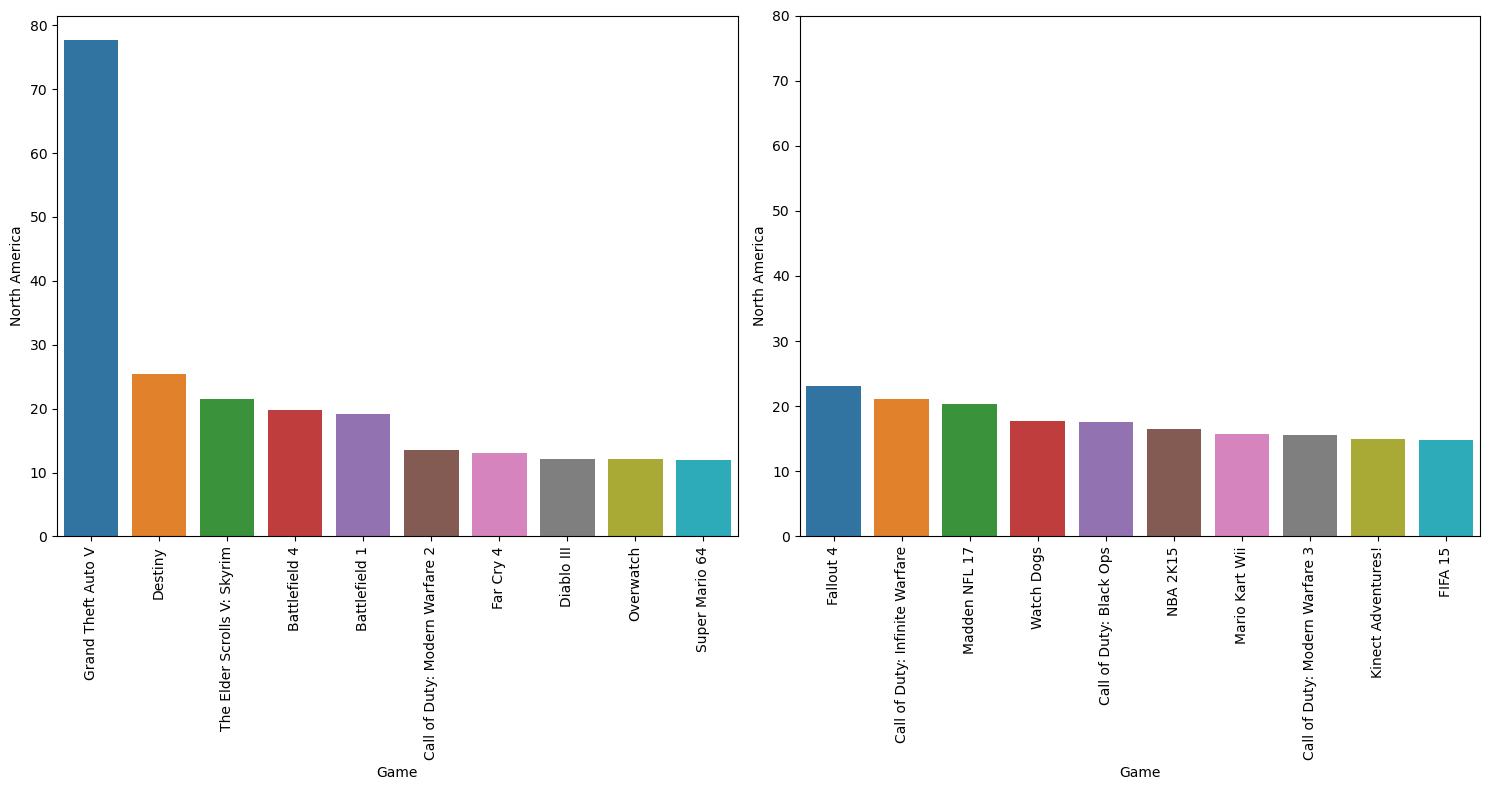

In [5]:
# plotting the NA region
plot_na_region()

### Takeaways:

* Selling over 10 million in a region doesn't gaurantee a spot on the Ranked list.


# How does meta score relate to Top 500 Rank?


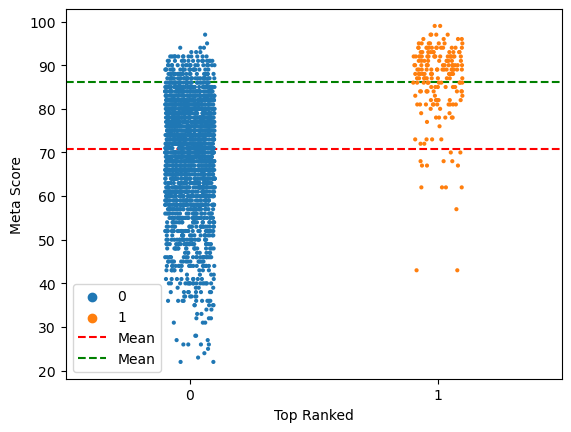

In [6]:
# plotting the meta score
plot_meta()

### Takeaways:
* Most Top Ranked games have a Meta score of above 85
* We see that arounf the 90 the Meta Score of games that are unranked start to dwindle
* The highest ranked games are on the Ranked list

## Hypothesis

H
0
: Mean of Meta Scores for Top Ranked Games >= Mean of Meta Scores for All Games
\
H
a
: Mean of Meta Scores for Top Ranked Games < Mean of Meta Scores for All Game

In [7]:
# seting the alpha
α = 0.05

In [8]:
# stats testing for with one sample t-test
t, p = t_test_meta()

In [9]:
# printing conclusion for t-test
print(p/2 < α)
print(t < 0)

True
False


We fail to reject the null hypothesis.

# How does User Review Score relate to Top 500 Rank?

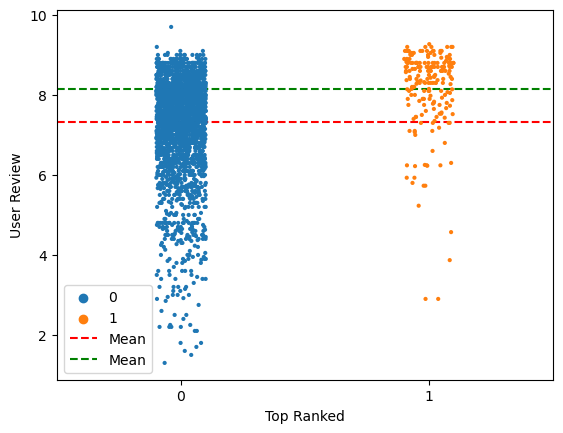

In [10]:
plot_user()

### Takeaways:
* User scores are on average lower than the meta score. 
* We can see that Users ranked a game above all others by .5 above the highest Ranked game.
* The lowest scoring Ranked game has about a 3.

## Hypothesis

H
0
: Mean of User Review for Top Ranked Games >= Mean of User Review for All Games
\
H
a
: Mean of User Review for Top Ranked Games < Mean of User Review for All Game

In [11]:
# stats testing for User Review with one sample t-test
t, p = t_test_user()

In [12]:
# printing conclusion for t-test
print(p/2 < α)
print(t < 0)

True
False


We fail to reject the null hypothesis.

# How do Years relate to Top Ranked?

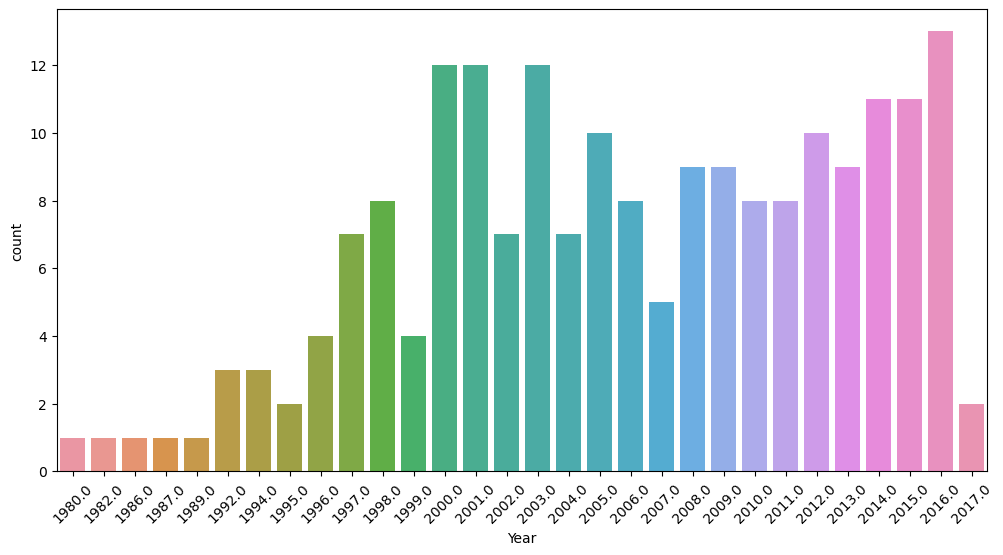

In [13]:
plot_year()

### Takeaways
* A steady increase in the number of games selected starting from the 80s.
* Dips and in the timeline may be due to console releases and developers learning the sytem architecture.
* Some games really stand the test of time

# Evaluation Summary:

* Region sales or popularity do not mean a Top Ranked video game. 
* Most Top Ranked games have a Meta score of above 85
* The highest ranked games are on the Ranked list
* User scores are on average lower than the meta score. 
* The lowest scoring Ranked game has about a 3.
* A steady increase in the number of games selected starting from the 80s.
* Some games really stand the test of time

## Modeling

* Video Games that made the Top Ranked list makeup 7% of the data
* By assuming non-top-ranked a 93% baseline accuracy is achieved
* I will compare how each model runs using various hyperparameters
* I will compare the train with validate data
* I will use accuracy as my evaluation metric
* The best preforming model will be used on my test data

# Decision Tree

In [14]:
print_tree_reprt()

*************FINAL ANALYSIS*************

Top Model #1

Top performing Training Model:
            
    Max Depth:6
    Accuracy:0.9874306839186692
            
    Top performing Validation Model:

    Max Depth:6
    Accuracy:0.9637931034482758
    Difference:0.01451494677799725
---------------------------------


* Decision Tree accuracy is 3 points better than baseline


## KNN model

In [15]:
print_knn_report()

*************FINAL ANALYSIS*************

Top Model #1

Top performing Training Model:
            
    Max Depth:16
    Accuracy:0.9438077634011091
            
    Top performing Validation Model:

    Max Depth:16
    Accuracy:0.9508620689655173
    Difference:-0.007054305564408225
---------------------------------


* KNN accuracy is 2 points better than baseline


# Random Forest Model

In [16]:
print_forest_report()


Top Model #1
*************FINAL ANALYSIS*************

Top performing Training Model:
            Max Depth:8
            Leaf Level:3
            Accuracy:0.9741219963031423
            
    Top performing Validation Model:

            Max Depth:8
            Leaf Level:3
            Accuracy:0.9594827586206897
            Difference:0.014639237682452677


* Random Forest accuracy is 3 points better than baseline


# Log Regeression Model

In [17]:
print_log_report()

*************FINAL ANALYSIS*************

Top Model #1

Top performing Training Model:
            
    Model Coefficient:0.06
    Accuracy:0.4953789279112754
            
    Top performing Validation Model:

    Max Depth:0.06
    Accuracy:0.5
    Difference:-0.004621072088724587
---------------------------------


* Log Regression accuracy is 35 points worse than baseline


# Comparing Summary
* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The Decision model had a slighlty higher accuracy than the three best models
* Decision Model preformed 0.03 better than baseline in testing

* The Decision Model with a Max Depth of 6 was selected to run the test data. This model also was 3 points better than baseline.

# Decision Tree Model Testing

In [18]:
model_tree_test()

Accuracy of KNN on test data is: 0.9617373319544984



## Modeling Summary

* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The Decision model had a slighlty higher accuracy than the three best models
* Decision Model preformed 0.03 better than baseline in testing

* Test performed 3 points better than accuracy. 


# Conclusion

## Exploration Summary
* Region sales or popularity do not mean a Top Ranked video game. 
* Most Top Ranked games have a Meta score of above 85
* The highest ranked games are on the Ranked list
* User scores are on average lower than the meta score. 
* The lowest scoring Ranked game has about a 3.
* A steady increase in the number of games selected starting from the 80s.
* Some games really stand the test of time


## Modeling
* The final model performed 3 points better than baseline (.93). There was not a whole lot of room for improvement. 
* Model improved 42% of the possible improvement room of 7 points.
* 3% is 144 possible selections accurately predicted.


## Recommendations
* I don't reccomend to move forward just yet. More options need to be explored. Looking into Recall may be a better metric to make sure we are properly predicting the games on the all-time list.

## Next Steps
* Find more data to the video games. Example: Rating, Price at Launch, Availability(New), Online Connectivity, Multi/Single Player.
* Pick a model based on Recall. Accuracy is a good ocerall measure but Recall would let us know if the prediction is worth while. 